In [29]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
import pynmea2
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from tqdm.notebook import tqdm
import copy


In [30]:
files_list = glob(r'../../Interim_products'+ '/*wind*')  
files_list.sort()

In [31]:
files_list

['../../Interim_products/relativewind_pt1.csv',
 '../../Interim_products/relativewind_pt2.csv',
 '../../Interim_products/relativewind_pt3.csv']

In [32]:
li = []


for filename in tqdm(files_list):
    df = pd.read_csv(filename, header=0, sep=',',index_col=False)
    li.append(df)
relwind = pd.concat(li, axis=0)

In [33]:
relwind = relwind.reset_index()
relwind = relwind.drop(['index'], axis=1)

In [34]:
dt = []
for i in tqdm(range(len(relwind.datetime))):
    dt.append(datetime.strptime(relwind['datetime'][i], '%Y-%m-%d %H:%M:%S'))
relwind['datetime [UTC]'] = dt

In [40]:
relwind

,datetime,wind_speed,wind_speed_unit,wind_angle,wind_angle_ref,datetime [UTC]
0,2020-01-15 12:02:55,3.7,N,151.1,R,2020-01-15 12:02:55
1,2020-01-15 12:02:55,3.1,N,164.0,R,2020-01-15 12:02:55
2,2020-01-15 12:02:56,3.4,N,127.2,R,2020-01-15 12:02:56
3,2020-01-15 12:02:56,3.1,N,169.6,R,2020-01-15 12:02:56
4,2020-01-15 12:02:57,4.7,N,184.6,R,2020-01-15 12:02:57
...,...,...,...,...,...,...
5727039,2020-02-24 14:20:20,11.4,N,120.7,R,2020-02-24 14:20:20
5727040,2020-02-24 14:20:20,12.8,N,127.0,R,2020-02-24 14:20:20
5727041,2020-02-24 14:20:21,10.5,N,136.4,R,2020-02-24 14:20:21
5727042,2020-02-24 14:20:21,11.1,N,150.5,R,2020-02-24 14:20:21


In [41]:
import matplotlib.pyplot as plt
font_size=23
plt.rcParams.update({'font.size': font_size})

Text(0.5, 0, 'Date')

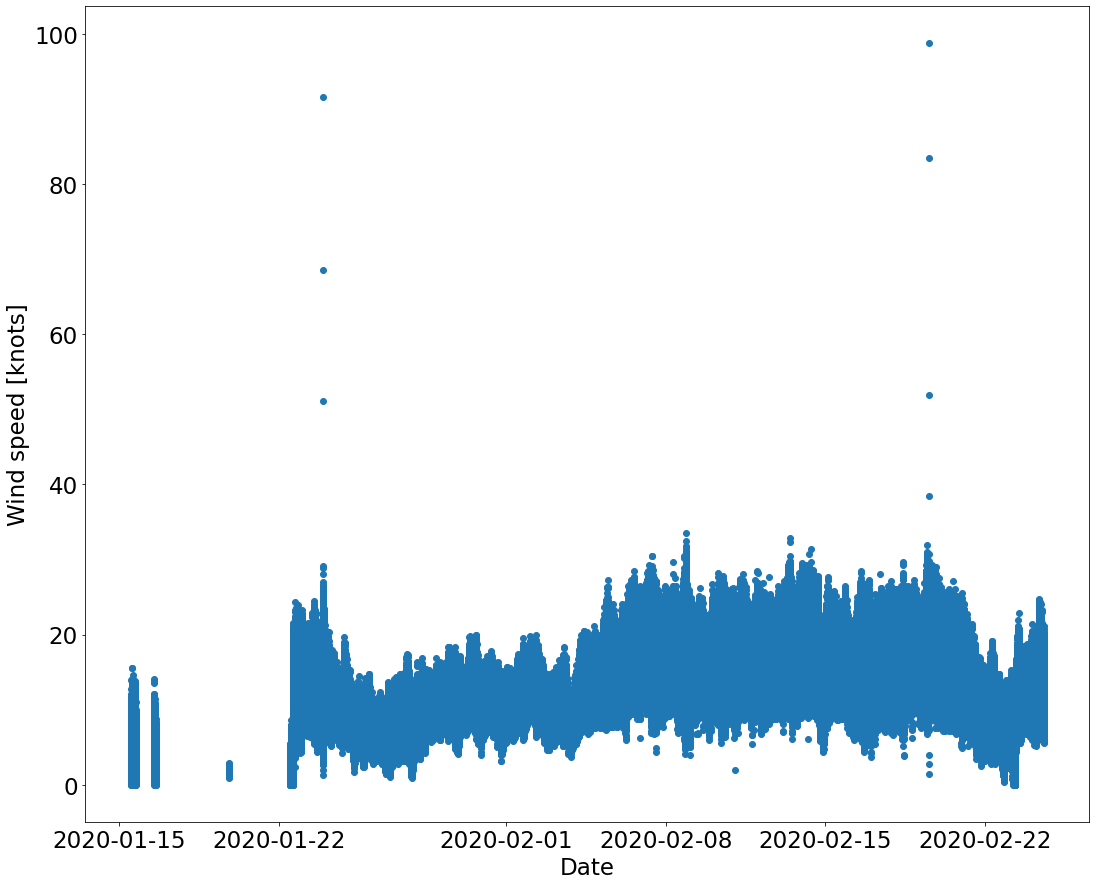

In [45]:
fig,ax = plt.subplots(1,1, figsize=(18, 15))
ax.scatter(relwind['datetime [UTC]'], relwind['wind_speed'])
#ax.set_ylim(0,35)
#ax.set_xlim(timedelta())
ax.set_ylabel("Wind speed [knots]")
ax.set_xlabel('Date')

In [43]:
# to check  all units are knots(N)
relwind.wind_speed_unit.unique()

array(['N'], dtype=object)

In [44]:
# to check all wind speeds are relative to heading(R)
relwind.wind_angle_ref.unique()

array(['R'], dtype=object)